In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#import data , data have been collected of different resources and put in one file
data=pd.read_csv('FTSE.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])
data.head(3)

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,,,,,
2009-01-02,4561.8,29.611424,31.838832,1.0407,9.8940,599.7796,1.5620,1.4502,2.7050,2.90
2009-01-05,4579.6,31.469160,33.370765,1.0684,9.9493,590.3900,1.5835,1.4567,2.6475,2.85
2009-01-06,4638.9,33.289201,33.064504,1.0979,10.0393,574.6796,1.5881,1.4686,2.6138,2.82


In [3]:
# information about data and also can find out if there are any missing data or not
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2767 entries, 2009-01-02 to 2019-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FTSE 100  2717 non-null   float64
 1   OILB      2715 non-null   float64
 2   OILT      2712 non-null   float64
 3   GBP/EURO  2718 non-null   float64
 4   GBP/CNY   2718 non-null   float64
 5   GOLD      2716 non-null   float64
 6   SONIA     2718 non-null   float64
 7   GBP/USD   2718 non-null   float64
 8   3LIBOR    2718 non-null   float64
 9   6LIBOR    2718 non-null   float64
dtypes: float64(10)
memory usage: 237.8 KB


In [4]:
#check correlation between FTSE100 and inputs 
corr=data.corr()
corr

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
FTSE 100,1.000000,-0.018939,-0.039593,0.022195,-0.749888,0.470151,-0.156594,-0.576271,-0.604602,-0.698530
OILB,-0.018939,1.000000,0.965134,-0.232656,0.283127,0.367791,0.086369,0.434863,0.016506,0.068158
OILT,-0.039593,0.965134,1.000000,-0.273274,0.339481,0.243139,0.031441,0.463078,-0.017393,0.036701
GBP/EURO,0.022195,-0.232656,-0.273274,1.000000,0.107319,-0.250482,-0.149109,0.330335,-0.232358,-0.208115
GBP/CNY,-0.749888,0.283127,0.339481,0.107319,1.000000,-0.553764,0.055728,0.890155,0.262119,0.377552
GOLD,0.470151,0.367791,0.243139,-0.250482,-0.553764,1.000000,0.049545,-0.477219,-0.174608,-0.179125
SONIA,-0.156594,0.086369,0.031441,-0.149109,0.055728,0.049545,1.000000,-0.050722,0.686952,0.608111
GBP/USD,-0.576271,0.434863,0.463078,0.330335,0.890155,-0.477219,-0.050722,1.000000,0.102088,0.198267
3LIBOR,-0.604602,0.016506,-0.017393,-0.232358,0.262119,-0.174608,0.686952,0.102088,1.000000,0.976496
6LIBOR,-0.698530,0.068158,0.036701,-0.208115,0.377552,-0.179125,0.608111,0.198267,0.976496,1.000000


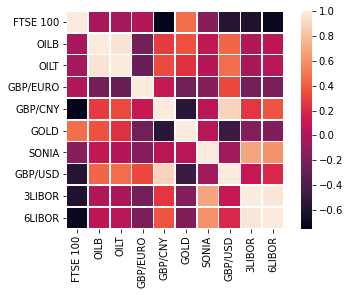

In [5]:
# visualize correlation between data
sns.heatmap(corr,linewidth=0.5,square=True)

In [6]:
#sort correlation
corr['FTSE 100'].sort_values(ascending=False)

FTSE 100    1.000000
GOLD        0.470151
GBP/EURO    0.022195
OILB       -0.018939
OILT       -0.039593
SONIA      -0.156594
GBP/USD    -0.576271
3LIBOR     -0.604602
6LIBOR     -0.698530
GBP/CNY    -0.749888
Name: FTSE 100, dtype: float64

In [7]:
# remove outputs which have weak correlation
data.drop(['GBP/EURO','OILT','OILB','SONIA'],axis=1,inplace=True)
data

,FTSE 100,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,
2009-01-02,4561.80,9.8940,599.779600,1.4502,2.7050,2.90
2009-01-05,4579.60,9.9493,590.390000,1.4567,2.6475,2.85
2009-01-06,4638.90,10.0393,574.679600,1.4686,2.6138,2.82
2009-01-07,4507.50,10.3595,569.894400,1.5161,2.5688,2.77
2009-01-08,4505.40,10.3887,554.280750,1.5201,2.5025,2.71
...,...,...,...,...,...,...
2019-12-23,7623.59,9.0642,1147.983720,1.2926,0.7996,0.88
2019-12-24,7632.24,9.0714,1151.383455,1.2948,0.7976,0.88
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# remove missing data
data.dropna(inplace=True)

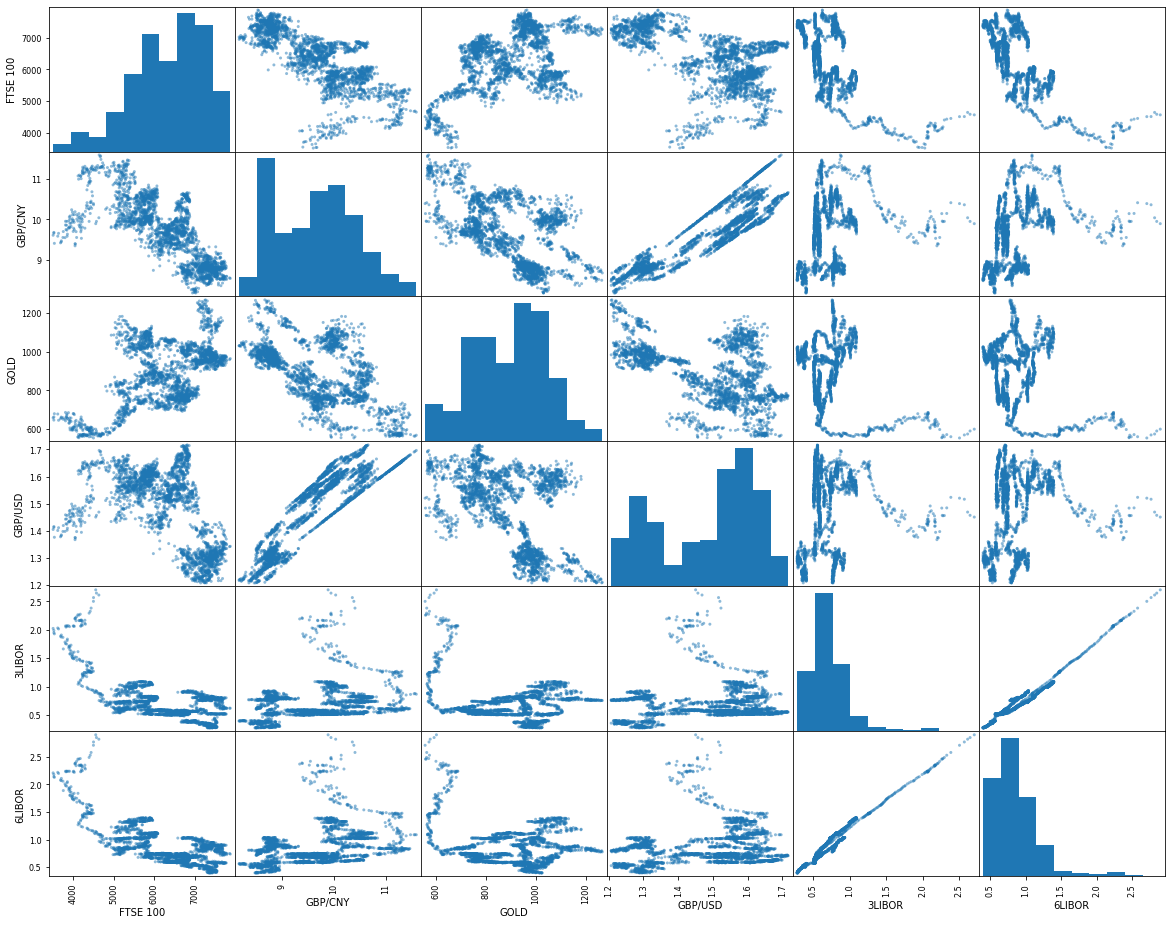

In [9]:
# visualize correlation between data
pd.plotting.scatter_matrix(data,figsize=(20,16))
plt.show()

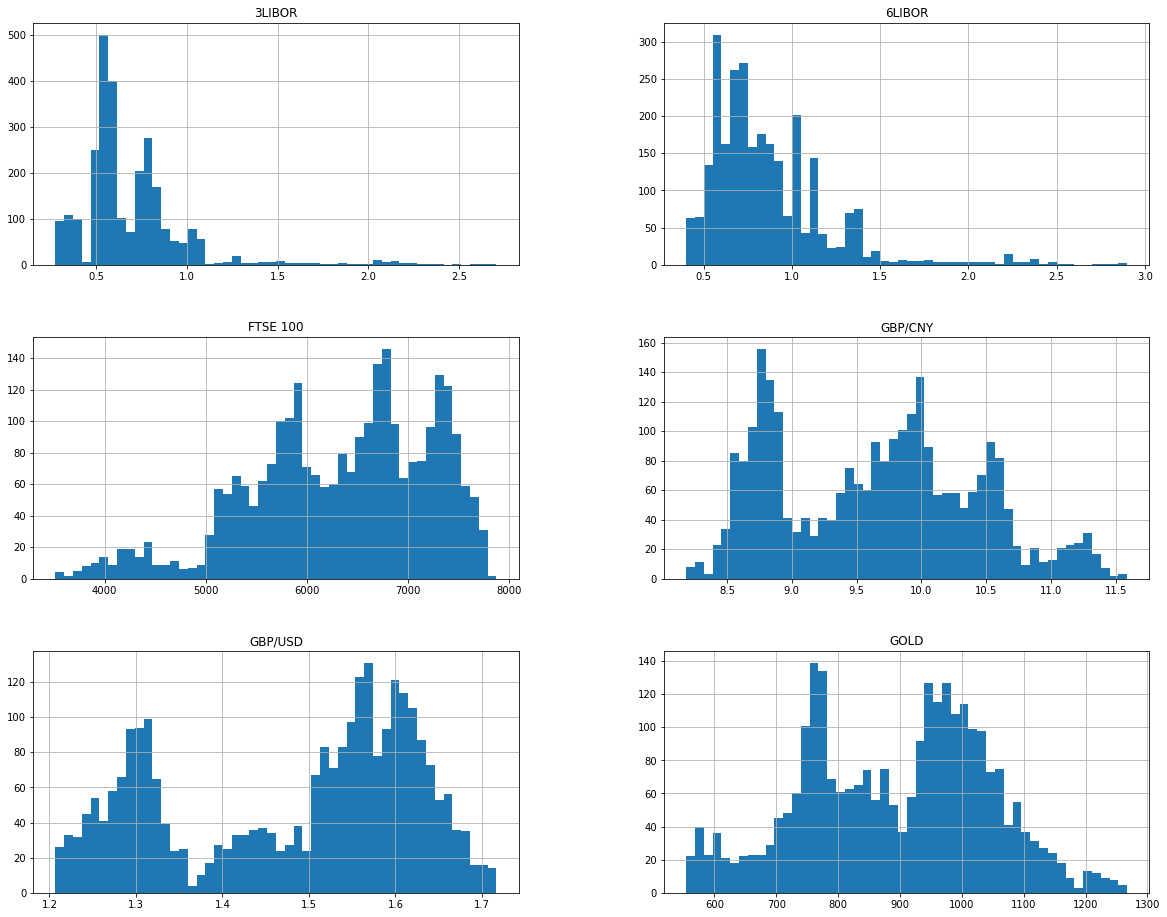

In [10]:
# each data distribution
data.hist(bins=50,figsize=(20,16))
plt.show()

In [11]:
# categorize output (FTSE 100) into two categories, 0 for downward and 1 for upward trend,use MACD indicator for categorizing
mean_12=data['FTSE 100'].rolling(window=12).mean()
mean_26=data['FTSE 100'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1
        

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [12]:
# remove FTSE 100 price column, the output is target column
data=data.iloc[:,1:]
data.head(3)

,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR,target
Date,,,,,,
2009-02-11,9.8070,642.4496,1.4352,2.0819,2.25,0
2009-02-12,9.7378,662.5936,1.4248,2.0700,2.24,0
2009-02-13,9.8717,650.7124,1.4434,2.0669,2.23,0


In [13]:
#define X and y,there are 5 inputs and 1 output
X=data.iloc[:,:5]
y=data.iloc[:,5]

In [14]:
X.head(3)

,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR
Date,,,,,
2009-02-11,9.8070,642.4496,1.4352,2.0819,2.25
2009-02-12,9.7378,662.5936,1.4248,2.0700,2.24
2009-02-13,9.8717,650.7124,1.4434,2.0669,2.23


In [15]:
#split data 80% for train and 20% for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [16]:
#distribution of categories in train set
y_train.value_counts()

1    1182
0     968
Name: target, dtype: int64

In [17]:
#distribution of categories in test set
y_test.value_counts()

1    305
0    233
Name: target, dtype: int64

In [18]:
# standardize the inputs
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
X_train

array([[ 1.18921879,  0.82295801,  1.12015486,  0.58168845,  0.8888369 ],
       [-1.35856029,  0.68832169, -1.62553533, -1.2787983 , -1.14735543],
       [ 0.20386513, -0.81046742,  0.85293785, -0.4819876 , -0.55620281],
       ...,
       [ 0.06851725, -0.46830776,  0.73488165, -0.61788073, -0.85177912],
       [ 1.0463662 , -0.80200797,  1.37959572, -0.58608401, -0.68757006],
       [ 0.40412207,  0.88964959,  0.59066929,  0.12820664,  0.39620973]])

# SVM model with rbf kernel

In [20]:
# use different range of hyperparameter to find out the best one
parameters={'C':[0.01,0.1,1,10,100,1000],'kernel':['rbf'],'gamma':[0.01,0.1,1,2,3,4,5,6]}

In [21]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(svm.SVC(), parameters,verbose=0,cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf']})

In [22]:
# best parameters through hyperparameter tuning
clf.best_params_

{'C': 100, 'gamma': 6, 'kernel': 'rbf'}

In [23]:
clf.best_score_

0.8599975586254542

In [24]:
# train model with best hyperparameter
classifier = svm.SVC(kernel =clf.best_params_['kernel'],C=clf.best_params_['C'],gamma=clf.best_params_['gamma']) 
classifier.fit(X_train, y_train)

SVC(C=100, gamma=6)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [27]:
# accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8698884758364313

In [28]:
# summary of accuracy and other metrics for model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       233
           1       0.89      0.88      0.88       305

    accuracy                           0.87       538
   macro avg       0.87      0.87      0.87       538
weighted avg       0.87      0.87      0.87       538



# SVM model with polynomial kernel

In [29]:
parameters={'C':[0.01,0.1,1,10,100,1000],'kernel':['poly'],'degree':[1,2,3,4,5,6,7,8]}

In [30]:
clf2= GridSearchCV(svm.SVC(), parameters,verbose=0,cv=3)
clf2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8],
                         'kernel': ['poly']})

In [31]:
clf2.best_params_

{'C': 1000, 'degree': 6, 'kernel': 'poly'}

In [32]:
clf2.best_score_

0.7111607177641165

In [33]:
classifier2 = svm.SVC(kernel =clf2.best_params_['kernel'],C=clf2.best_params_['C'],degree=clf2.best_params_['degree']) 
classifier2.fit(X_train, y_train)

SVC(C=1000, degree=6, kernel='poly')

In [34]:
y_pred2 = classifier2.predict(X_test) 
y_pred2

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.6877323420074349

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       233
           1       0.70      0.79      0.74       305

    accuracy                           0.69       538
   macro avg       0.68      0.67      0.67       538
weighted avg       0.69      0.69      0.68       538

